In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from IPython.display import display
import matplotlib.colors as mcolors

%matplotlib inline

in_fid = r'.\Stata_mean_all.csv'

# The specified .csv file comes from Layers_AllMyope_9_9_16_qvh_edits_11_26_16.xlsx, the sheet titled "Means Data"
#in_fid = r'.\Prev_Hoang_Stata_Formatted.csv'

in_data = pd.read_csv(in_fid)

in_data['alpha'] *= 1e6

in_data.drop('absref',inplace=True,axis=1) # No need for the absolute refractive error. At least not for now

# Drop any rows for which the ROI is < 0.2mm away from ONH
in_data = in_data[in_data['ROI'] >= 0.2]

# Add a column to bin the ROIs 
#in_data['roi_bin'] = pd.cut(in_data['ROI'],[0.2,0.8, 1.4, 2, 2.6, 3.2, 3.8, 4.4, 10],labels=['0.2-0.8','0.8-1.4','1.4-2','2-2.6','2.6-3.2','3.2-3.8','3.8-4.4','4.4+'])
in_data['roi_bin'] = pd.cut(in_data['ROI'],[0.2,0.8, 1.4, 2, 2.6, 3.2, 10],labels=['0.2-0.8','0.8-1.4','1.4-2','2-2.6','2.6-3.2','3.2+'])

in_data.head()

,GP,relmyo,myolevel,Eye,Region,ROI,Layer,c,K,rho,alpha,Z,roi_bin
0,11-3,0.0,EM,LE,INF,3.0,1,1539.506290,2.411560,1.010301,5.64914,1.552666,2.6-3.2
1,11-3,0.0,EM,LE,INF,3.0,2,1657.062430,2.651613,0.972564,8.27821,1.598058,2.6-3.2
2,11-3,0.0,EM,LE,INF,3.0,3,1542.023357,2.491418,1.033950,9.09870,1.598457,2.6-3.2
3,11-3,0.0,EM,LE,INF,3.0,4,1537.778997,2.449821,1.023842,7.83145,1.574614,2.6-3.2
4,11-3,0.0,EM,LE,INF,3.2,1,1536.662753,2.463480,1.040776,7.18819,1.595334,2.6-3.2


In [3]:
in_data.groupby('GP').count()

,relmyo,myolevel,Eye,Region,ROI,Layer,c,K,rho,alpha,Z,roi_bin
GP,,,,,,,,,,,,
11-3,163,163,163,163,163,163,163,163,163,163,163,163
12-1,160,160,160,160,160,160,160,160,160,160,160,160
12-2,20,20,20,20,20,20,20,20,20,20,20,20
12-4,68,68,68,68,68,68,68,68,68,68,68,68
24-3,28,28,28,28,28,28,28,28,28,28,28,28
39-2,8,8,8,8,8,8,8,8,8,8,8,8
9-1,52,52,52,52,52,52,52,52,52,52,52,52
9-2,8,8,8,8,8,8,8,8,8,8,8,8


In [4]:
in_data.describe()

,relmyo,ROI,Layer,c,K,rho,alpha,Z
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.148462,2.855621,2.497041,1660.571738,2.738781,1.004549,9.342165,1.652180
std,3.656831,1.000782,1.118251,110.360715,0.241423,0.038255,3.593676,0.078102
min,0.000000,1.200000,1.000000,1488.161696,2.396095,0.931050,0.490948,1.541316
25%,0.000000,2.000000,1.500000,1568.490008,2.541849,0.974168,6.757915,1.596790
50%,0.000000,2.600000,2.000000,1639.692405,2.672861,0.999104,9.220230,1.633308
75%,7.130000,3.800000,3.000000,1748.702999,2.933975,1.032429,11.775150,1.686140
max,9.290000,4.800000,4.000000,2091.749131,3.362391,1.132472,23.912900,1.972843


<AxesSubplot:xlabel='ROI', ylabel='Z'>

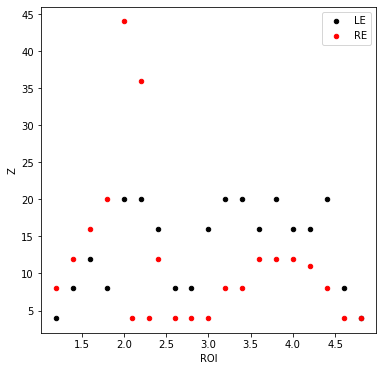

In [5]:
# Get the number of samples by ROI for each eye
le_data = in_data[in_data['Eye'] == 'LE']
re_data = in_data[in_data['Eye'] == 'RE']

le_count = le_data.groupby('ROI',as_index=False).count()
re_count = re_data.groupby('ROI',as_index=False).count()

# Plot against each other
this_fig, this_ax = plt.subplots(1,1,figsize=(6,6))
le_count.plot.scatter(x='ROI',y='Z',color='black',label='LE',ax=this_ax)
re_count.plot.scatter(x='ROI',y='Z',color='red',label='RE',ax=this_ax)

<AxesSubplot:xlabel='roi_bin', ylabel='Z'>

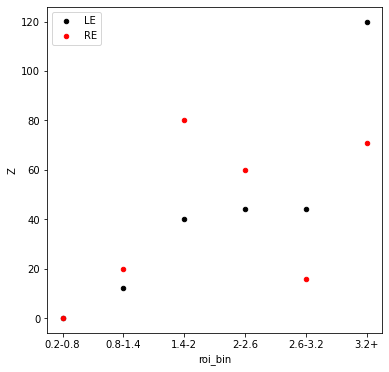

In [6]:
# Repeat, but perform the count by bin
le_count = le_data.groupby('roi_bin',as_index=False).count()
re_count = re_data.groupby('roi_bin',as_index=False).count()

# Plot against each other
this_fig, this_ax = plt.subplots(1,1,figsize=(6,6))
le_count.plot.scatter(x='roi_bin',y='Z',color='black',label='LE',ax=this_ax)
re_count.plot.scatter(x='roi_bin',y='Z',color='red',label='RE',ax=this_ax)

<AxesSubplot:xlabel='roi_bin'>

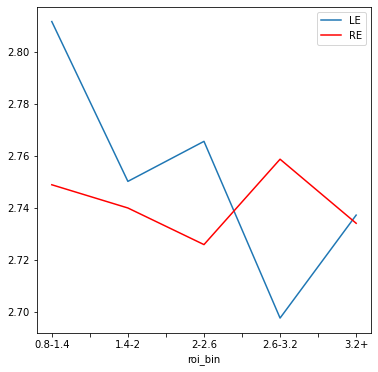

In [7]:
this_plt, ax = plt.subplots(figsize=(6,6))
le_data.groupby('roi_bin').mean().plot.line(y='K',ax=ax,label='LE')
re_data.groupby('roi_bin').mean().plot.line(y='K',ax=ax,color='red',label='RE')

<AxesSubplot:xlabel='roi_bin'>

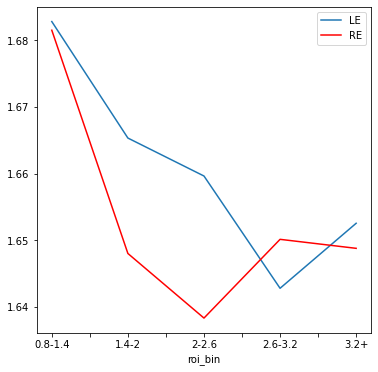

In [8]:
this_plt, ax = plt.subplots(figsize=(6,6))
le_data.groupby('roi_bin').mean().plot.line(y='Z',ax=ax,label='LE')
re_data.groupby('roi_bin').mean().plot.line(y='Z',ax=ax,color='red',label='RE')

,Diff (Inf-Sup),t-values,p-values
c,-30.722396,-3.065610,0.002289
K,-0.053240,-2.420115,0.015868
rho,0.006541,1.871970,0.061789
alpha,0.264322,0.803052,0.422322
Z,-0.020030,-2.820275,0.004987


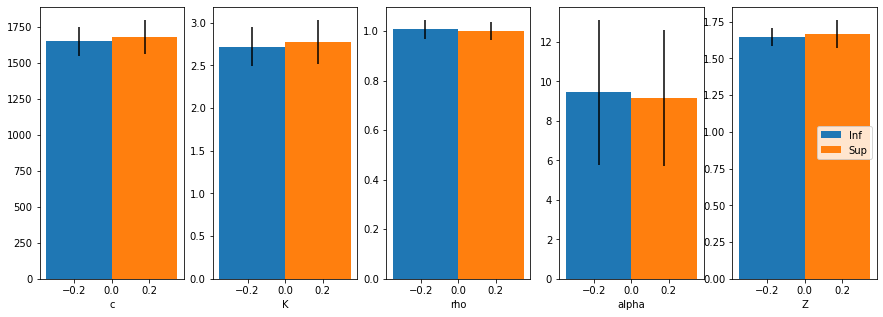

In [9]:
# Start comparing the parameter values. First, Inf vs Sup
param_list = ['c','K','rho','alpha','Z'] # List of parameters for comparison
num_param = len(param_list)

this_fig,this_ax = plt.subplots(1,num_param,figsize=((3*num_param),5))
this_ax = this_ax.ravel()

# First, for all eyes, compare parameters in Inf vs Sup
inf_data = in_data[in_data['Region'] == 'INF']
sup_data = in_data[in_data['Region'] == 'SUP']

param_diff = np.zeros((num_param,3)) # column 1 is mean diff, column 2 is t-values, column 3 is p-values

for pp in range(num_param):
    this_param = param_list[pp]
    this_t, this_p = scipy.stats.ttest_ind(inf_data[this_param],sup_data[this_param])
    this_diff = inf_data[this_param].mean() - sup_data[this_param].mean()
    param_diff[pp,:] = [this_diff,this_t,this_p]

    p_x = [this_param, this_param]
    p_y = [inf_data[this_param].mean(), sup_data[this_param].mean()]
    p_err = [inf_data[this_param].std(), sup_data[this_param].std()]

    b_width = 0.35
    this_ax[pp].bar(x=-b_width/2,height=p_y[0],width=b_width,label='Inf',yerr=p_err[0],color='tab:blue')
    this_ax[pp].bar(x=+b_width/2,height=p_y[1],width=b_width,label='Sup',yerr=p_err[1],color='tab:orange')
    this_ax[pp].set_xlabel(this_param)

this_ax[-1].legend(loc='center right')
# Create a DataFrame from the t-test results
this_df = pd.DataFrame(param_diff,columns=['Diff (Inf-Sup)','t-values','p-values'],index=param_list)
display(this_df)

LE                                  RE                     
      Diff (Inf-Sup) t-values    p-values Diff (Inf-Sup) t-values    p-values
c           -26.1188  -1.7947  7.3868e-02       -35.3351  -2.4107  1.6661e-02
K            -0.0887  -2.8554  4.6478e-03        -0.0099  -0.2973  7.6650e-01
rho          -0.0127  -2.9030  4.0158e-03         0.0326   5.8913  1.2592e-08
alpha         0.0060   0.0152  9.8785e-01         0.8196   1.4225  1.5614e-01
Z            -0.0543  -5.1430  5.3524e-07         0.0282   3.0611  2.4510e-03

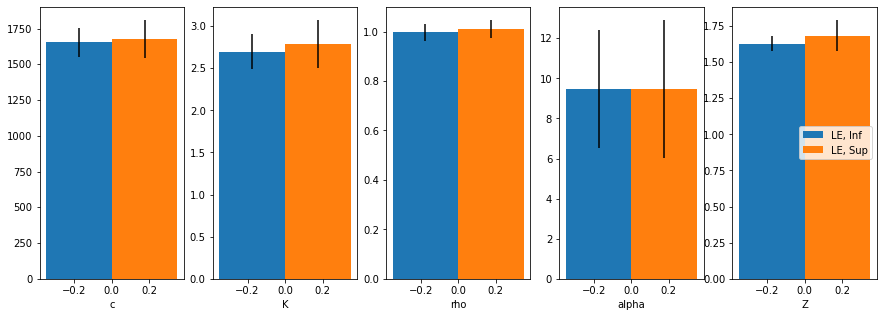

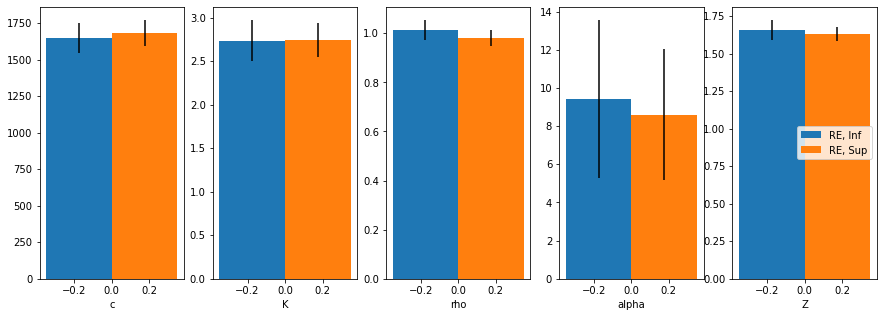

In [10]:
# Repeat the Inf-Sup comparisons for LE and RE individually. Then compare LE-RE for Inf and Sup
le_param_diff = np.zeros((num_param,3))
re_param_diff = np.zeros((num_param,3))

le_inf_data = le_data[le_data['Region'] == 'INF']
le_sup_data = le_data[le_data['Region'] == 'SUP']
re_inf_data = re_data[re_data['Region'] == 'INF']
re_sup_data = re_data[re_data['Region'] == 'SUP']

le_fig, le_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
re_fig, re_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))

le_ax = le_ax.ravel()
re_ax = re_ax.ravel()

for pp in range(num_param):
    this_param = param_list[pp]
    
    # t-test for left eye first
    this_t, this_p = scipy.stats.ttest_ind(le_inf_data[this_param],le_sup_data[this_param])
    this_diff = le_inf_data[this_param].mean() - le_sup_data[this_param].mean()
    le_param_diff[pp,:] = [this_diff, this_t, this_p]

    # Plot the mean values with std as error bars
    b_width = 0.35
    p_y = [le_inf_data[this_param].mean(), le_sup_data[this_param].mean()]
    p_err = [le_inf_data[this_param].std(), le_sup_data[this_param].std()]
    le_ax[pp].bar(x=-b_width/2,height=p_y[0],yerr=p_err[0],width=b_width,label='LE, Inf',color='tab:blue')
    le_ax[pp].bar(x=+b_width/2,height=p_y[1],yerr=p_err[1],width=b_width,label='LE, Sup',color='tab:orange')
    le_ax[pp].set_xlabel(this_param)
    

    # t-test for right eye
    this_t, this_p = scipy.stats.ttest_ind(re_inf_data[this_param],re_sup_data[this_param])
    this_diff = re_inf_data[this_param].mean() - re_sup_data[this_param].mean()
    re_param_diff[pp,:] = [this_diff,this_t,this_p]
    
    # Plot the mean values for the right eye with std as error bars
    p_y = [re_inf_data[this_param].mean(), re_sup_data[this_param].mean()]
    p_err = [re_inf_data[this_param].std(), re_sup_data[this_param].std()]
    re_ax[pp].bar(x=-b_width/2,height=p_y[0],yerr=p_err[0],width=b_width,label='RE, Inf',color='tab:blue')
    re_ax[pp].bar(x=+b_width/2,height=p_y[1],yerr=p_err[1],width=b_width,label='RE, Sup',color='tab:orange')
    re_ax[pp].set_xlabel(this_param)

le_ax[-1].legend(loc='center right')
re_ax[-1].legend(loc='center right')

# Create DataFrames for the LE and RE summaries, this combine into one with a MultiIndex to summarize more concisely
le_df = pd.DataFrame(le_param_diff,columns=['Diff (Inf-Sup)','t-values','p-values'],index=param_list)
re_df = pd.DataFrame(re_param_diff,columns=['Diff (Inf-Sup)','t-values','p-values'],index=param_list)

le_df.columns = pd.MultiIndex.from_product([['LE'], le_df.columns])
re_df.columns = pd.MultiIndex.from_product([['RE'], re_df.columns])
full_df = pd.concat([le_df, re_df],axis=1)

pd.set_option('precision',4)
full_df


INF                            SUP                     
      Diff (LE-RE) t-values p-values Diff (LE-RE) t-values    p-values
c           6.1848   0.5234   0.6011      -3.0314  -0.1663  8.6812e-01
K          -0.0372  -1.4371   0.1517       0.0417   1.0446  2.9753e-01
rho        -0.0168  -3.9146   0.0001       0.0286   5.2743  3.6083e-07
alpha       0.0521   0.1238   0.9015       0.8656   1.6437  1.0190e-01
Z          -0.0273  -3.8590   0.0001       0.0552   3.8651  1.5235e-04

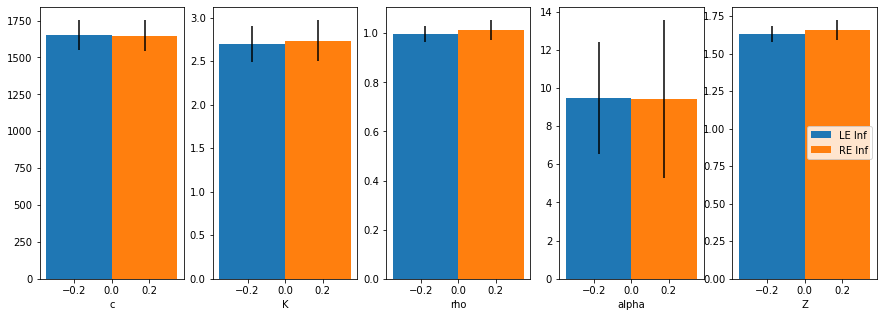

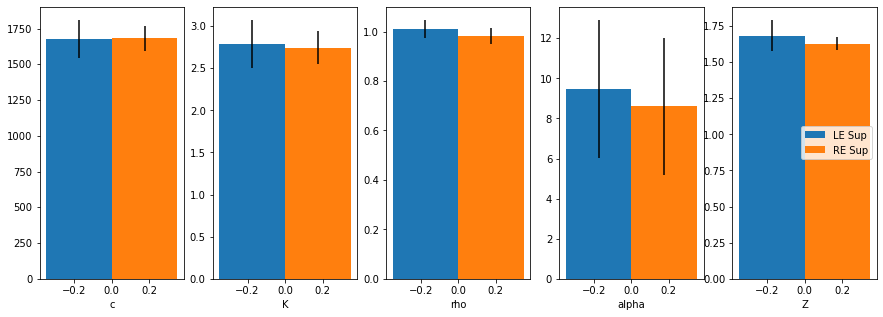

In [11]:
# This time, compare the Inf and Sup regions between LE and RE

inf_param_diff = np.zeros((num_param,3))
sup_param_diff = np.zeros((num_param,3))

inf_fig, inf_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
sup_fig, sup_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))

inf_ax = inf_ax.ravel()
sup_ax = sup_ax.ravel()

for pp in range(num_param):
    this_param = param_list[pp]

    # Compare INF regions between LE and RE
    this_t, this_p = scipy.stats.ttest_ind(le_inf_data[this_param],re_inf_data[this_param])
    this_diff = le_inf_data[this_param].mean() - re_inf_data[this_param].mean()
    inf_param_diff[pp,:] = [this_diff,this_t,this_p]

    bar_width = 0.35
    p_x = [-bar_width/2, +bar_width/2]
    p_y = [le_inf_data[this_param].mean(), re_inf_data[this_param].mean()]
    p_err = [le_inf_data[this_param].std(), re_inf_data[this_param].std()]
    inf_ax[pp].bar(x=p_x[0],height=p_y[0],yerr=p_err[0],width=b_width,label='LE Inf',color='tab:blue')
    inf_ax[pp].bar(x=p_x[1],height=p_y[1],yerr=p_err[1],width=b_width,label='RE Inf',color='tab:orange')
    inf_ax[pp].set_xlabel(this_param)

    # Now compare SUP regions
    this_t, this_p = scipy.stats.ttest_ind(le_sup_data[this_param],re_sup_data[this_param])
    this_diff = le_sup_data[this_param].mean() - re_sup_data[this_param].mean()
    sup_param_diff[pp,:] = [this_diff,this_t,this_p]

    p_y = [le_sup_data[this_param].mean(), re_sup_data[this_param].mean()]
    p_err = [le_sup_data[this_param].std(), re_sup_data[this_param].std()]
    sup_ax[pp].bar(x=p_x[0],height=p_y[0],yerr=p_err[0],width=b_width,label='LE Sup',color='tab:blue')
    sup_ax[pp].bar(x=p_x[1],height=p_y[1],yerr=p_err[1],width=b_width,label='RE Sup',color='tab:orange')
    sup_ax[pp].set_xlabel(this_param)

inf_ax[-1].legend(loc='center right')
sup_ax[-1].legend(loc='center right')

# As before, create DataFrames and concatenate with MultiIndex to create a concise summary
inf_df = pd.DataFrame(inf_param_diff,columns=['Diff (LE-RE)','t-values','p-values'],index=param_list)
sup_df = pd.DataFrame(sup_param_diff,columns=['Diff (LE-RE)','t-values','p-values'],index=param_list)

inf_df.columns = pd.MultiIndex.from_product([['INF'], inf_df.columns])
sup_df.columns = pd.MultiIndex.from_product([['SUP'], sup_df.columns])

full_df = pd.concat([inf_df,sup_df],axis=1)

full_df

,f-stat,p-value
c,168.6849,1.1592e-75
K,152.8860,2.0333e-70
rho,77.7356,2.5089e-41
alpha,66.3122,3.8207e-36
Z,50.5151,1.4929e-28


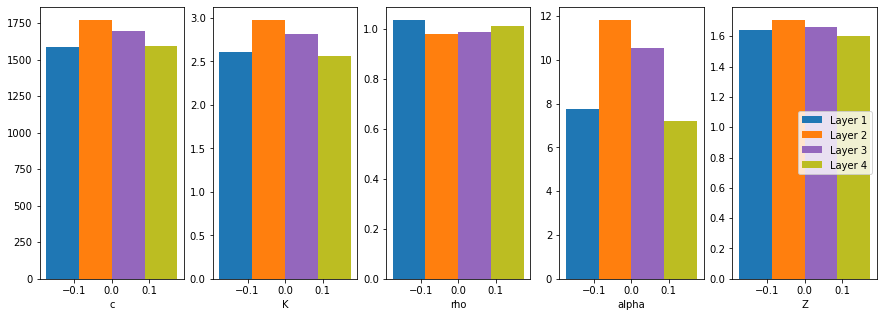

In [12]:
# Before starting to repeat some of the above on a per-layer basis, look for a difference in the parameters by layer generally
# Use ANOVA to determine if any of them differ
# Look at all eyes, then split into Inf/Sup and then further into LE/RE

fstats_all = np.zeros((num_param,2))

layer_fig, layer_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
b_width = 0.35/4
p_x = [-3*b_width/2, -b_width/2, b_width/2, 3*b_width/2]

color_list = ['tab:blue','tab:orange','tab:purple','tab:olive']

for pp, this_param in enumerate(param_list):
    this_fstat, this_p = scipy.stats.f_oneway(in_data[this_param][in_data['Layer'] == 1],
            in_data[this_param][in_data['Layer'] == 2],
            in_data[this_param][in_data['Layer'] == 3],
            in_data[this_param][in_data['Layer'] == 4])
    
    for ii in range(4):
        this_data = in_data[this_param][in_data['Layer'] == (ii+1)]
        p_y = this_data.mean()
        p_err = this_data.std()
        layer_ax[pp].bar(x=p_x[ii],height=p_y,width=b_width,label=f'Layer {ii+1}',color=color_list[ii])
        
    layer_ax[pp].set_xlabel(this_param)

    fstats_all[pp,:] = this_fstat, this_p

layer_ax[-1].legend(loc='center right')

fstats_all_df = pd.DataFrame(fstats_all,columns=['f-stat','p-value'],index=param_list)
fstats_all_df

In [13]:
# ANOVA by LE/RE
fstats_le = np.zeros((num_param,2))
fstats_re = np.zeros((num_param,2))

for pp, this_param in enumerate(param_list):
    this_data = le_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_le[pp,:] = [this_fstat, this_p]

    this_data = re_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_re[pp,:] = [this_fstat, this_p]

fstats_le_df = pd.DataFrame(fstats_le,columns=['f-stat','p-value'],index=param_list)
fstats_re_df = pd.DataFrame(fstats_re,columns=['f-stat','p-value'],index=param_list)

fstats_le_df.columns = pd.MultiIndex.from_product([['LE'], fstats_le_df.columns])
fstats_re_df.columns = pd.MultiIndex.from_product([['RE'], fstats_re_df.columns])

fstats_lere_df = pd.concat([fstats_le_df,fstats_re_df],axis=1)
fstats_lere_df

LE                   RE            
        f-stat     p-value   f-stat     p-value
c      96.6979  7.1771e-42  75.7207  1.2974e-34
K      82.1303  2.9904e-37  71.2484  4.3049e-33
rho    42.3652  2.9008e-22  37.1131  8.8155e-20
alpha  27.2294  2.5646e-15  39.6744  6.6497e-21
Z      28.3969  6.9517e-16  23.5323  2.0904e-13

In [14]:
# ANOVA by LE/RE split further by Inf/Sup

fstats_le_inf = np.zeros((num_param,2))
fstats_re_inf = np.zeros((num_param,2))
fstats_le_sup = np.zeros((num_param,2))
fstats_re_sup = np.zeros((num_param,2))

for pp, this_param in enumerate(param_list):
    this_data = le_inf_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_le_inf[pp,:] = [this_fstat, this_p]

    this_data = re_inf_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_re_inf[pp,:] = [this_fstat, this_p]

    this_data = le_sup_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_le_sup[pp,:] = [this_fstat, this_p]

    this_data = re_sup_data
    this_fstat, this_p = scipy.stats.f_oneway(this_data[this_param][this_data['Layer'] == 1],
            this_data[this_param][this_data['Layer'] == 2],
            this_data[this_param][this_data['Layer'] == 3],
            this_data[this_param][this_data['Layer'] == 4])

    fstats_re_sup[pp,:] = [this_fstat, this_p]

fstats_leinf_df = pd.DataFrame(fstats_le_inf,columns=['f-stat','p-value'],index=param_list)
fstats_reinf_df = pd.DataFrame(fstats_re_inf,columns=['f-stat','p-value'],index=param_list)
fstats_lesup_df = pd.DataFrame(fstats_le_sup,columns=['f-stat','p-value'],index=param_list)
fstats_resup_df = pd.DataFrame(fstats_re_sup,columns=['f-stat','p-value'],index=param_list)

fstats_leinf_df.columns = pd.MultiIndex.from_product([['LE INF'], fstats_leinf_df.columns])
fstats_reinf_df.columns = pd.MultiIndex.from_product([['RE INF'], fstats_reinf_df.columns])
fstats_lesup_df.columns = pd.MultiIndex.from_product([['LE SUP'], fstats_lesup_df.columns])
fstats_resup_df.columns = pd.MultiIndex.from_product([['RE SUP'], fstats_resup_df.columns])

fstats_lere_reg_df = pd.concat([fstats_leinf_df,fstats_lesup_df,fstats_reinf_df,fstats_resup_df],axis=1)
fstats_lere_reg_df

LE INF               LE SUP               RE INF               RE SUP  \
        f-stat     p-value   f-stat     p-value   f-stat     p-value   f-stat   
c      40.1846  2.2856e-18  64.2036  4.0279e-25  49.8633  1.7862e-23  40.8079   
K      34.8843  1.5161e-16  57.4292  2.4093e-23  46.4017  3.1030e-22  37.7373   
rho    31.3390  2.9422e-15  18.2153  7.4171e-10  28.9003  2.7481e-15  21.5976   
alpha  15.5326  1.1249e-08  13.2775  1.4252e-07  24.6589  2.1064e-13  24.6165   
Z      11.8938  6.3721e-07  24.0927  2.3671e-12  18.7510  1.2732e-10  10.2580   

                   
          p-value  
c      1.6799e-14  
K      7.8509e-14  
rho    1.3160e-09  
alpha  1.6553e-10  
Z      1.5145e-05

In [15]:
# The ANOVA for each case indicates that parameters in at least one of the layers has a different mean value when compared to the other layers for all parameters
# Now, compare the Inf/Sup values in each layer over all eyes, intra-eye (LE/RE), and inter-eye (LE-RE)

# First, over all eyes
num_layers = 4
layer_diff = {} # Going to make use of dictionary

for pp, this_param in enumerate(param_list):
    temp_diff_mat = np.zeros((num_layers,3))
    for ll in range(num_layers):
        this_inf_data = inf_data[inf_data['Layer'] == (ll+1)][this_param]
        this_sup_data = sup_data[sup_data['Layer'] == (ll+1)][this_param]
        this_t, this_p = scipy.stats.ttest_ind(this_inf_data,this_sup_data)
        this_diff = this_inf_data.mean() - this_sup_data.mean()
        temp_diff_mat[ll,:] = [this_diff,this_t,this_p]

    layer_diff[this_param] = temp_diff_mat.copy()

# Create a DataFrame for each entry in the layer_diff dictionary, then concatenate all to concisely summarize
df_list = []
for pp, this_param in enumerate(param_list):
    this_df = pd.DataFrame(layer_diff[this_param],columns=['Inf-Sup','t-stat','p-value'],index=[1,2,3,4])
    this_df.columns = pd.MultiIndex.from_product([[this_param], this_df.columns])
    df_list.append(this_df)

full_df = pd.concat(df_list,axis=1)
full_df


c                           K                     rho          \
   Inf-Sup  t-stat     p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat   
1   2.2351  0.1772  8.5962e-01  0.0182  0.6375  0.5250  0.0044  0.6885   
2 -62.8794 -4.2353  4.3874e-05 -0.1162 -3.5739  0.0005  0.0040  0.6802   
3 -37.0934 -2.2587  2.5634e-02 -0.0848 -2.2247  0.0279  0.0042  0.7995   
4 -26.0126 -2.3036  2.2910e-02 -0.0322 -1.2741  0.2050  0.0137  2.4529   

            alpha                       Z                  
  p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value  
1  0.4924  1.1920  1.5959  0.1130 -0.0030 -0.2328  0.8163  
2  0.4977  0.2442  0.5077  0.6125 -0.0559 -3.3824  0.0010  
3  0.4255  0.0947  0.1920  0.8481 -0.0231 -2.0968  0.0380  
4  0.0156 -0.5043 -1.0978  0.2744  0.0013  0.1882  0.8510

c                       K                         rho          \
   Inf-Sup  t-stat p-value Inf-Sup  t-stat     p-value Inf-Sup  t-stat   
1  22.7522  1.5324  0.1304  0.0091  0.2330  8.1654e-01 -0.0197 -2.4028   
2 -77.5840 -3.9911  0.0002 -0.2206 -6.4801  1.5953e-08 -0.0221 -3.3582   
3 -29.7036 -1.0924  0.2788 -0.1000 -1.5981  1.1502e-01 -0.0111 -1.7018   
4 -19.9399 -1.4661  0.1476 -0.0433 -1.5831  1.1840e-01  0.0020  0.2799   

            alpha                       Z                      
  p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat     p-value  
1  0.0192  1.0315  1.1544  0.2527 -0.0354 -1.8339  7.1391e-02  
2  0.0013  0.1460  0.2820  0.7789 -0.1259 -5.7240  3.1097e-07  
3  0.0937 -0.7988 -1.1003  0.2754 -0.0442 -2.5856  1.2048e-02  
4  0.7804 -0.3545 -0.6158  0.5402 -0.0117 -1.5446  1.2745e-01

c                       K                     rho                  \
   Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value   
1 -17.3692 -0.7827  0.4369  0.0421  0.9312  0.3555  0.0320  3.4790  0.0009   
2 -26.6062 -1.1289  0.2634  0.0381  0.6715  0.5045  0.0379  4.0635  0.0001   
3 -50.6810 -2.7280  0.0083 -0.0804 -1.8173  0.0742  0.0256  3.0371  0.0035   
4 -47.9822 -2.4894  0.0156 -0.0428 -0.9156  0.3636  0.0351  3.9595  0.0002   

    alpha                       Z                  
  Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value  
1  2.1491  1.6491  0.1044  0.0433  2.7350  0.0082  
2  0.0079  0.0088  0.9930  0.0519  2.5499  0.0133  
3  1.2147  1.7584  0.0838  0.0016  0.1119  0.9112  
4 -0.1540 -0.2006  0.8417  0.0150  1.1313  0.2625

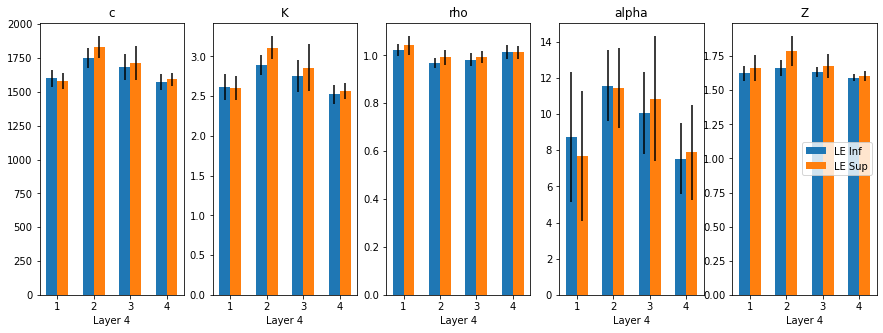

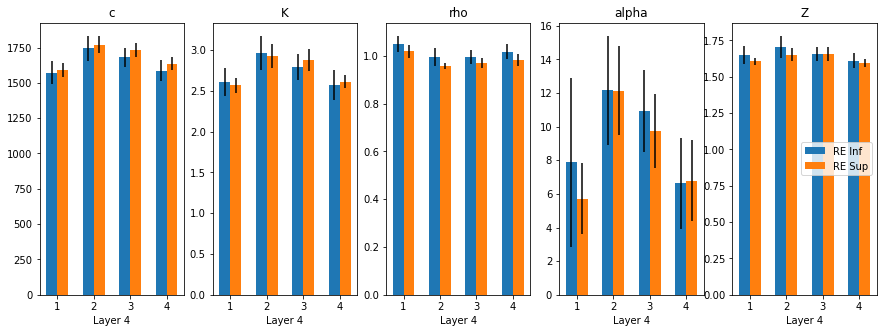

In [16]:
# Next, intra-eye differences
num_layers = 4
intra_le_diff = {} # Going to make use of dictionary
intra_re_diff = {}

b_width = 0.3
x_l = [1-b_width/2,2-b_width/2,3-b_width/2,4-b_width/2]
x_r = [1+b_width/2,2+b_width/2,3+b_width/2,4+b_width/2]

le_fig, le_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
re_fig, re_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))

le_ax = le_ax.ravel()
re_ax = re_ax.ravel()

for pp, this_param in enumerate(param_list):
    temp_le_diff_mat = np.zeros((num_layers,3))
    temp_re_diff_mat = np.zeros((num_layers,3))
    for ll in range(num_layers):
        this_inf_data = le_inf_data[le_inf_data['Layer'] == (ll+1)][this_param]
        this_sup_data = le_sup_data[le_sup_data['Layer'] == (ll+1)][this_param]
        this_t, this_p = scipy.stats.ttest_ind(this_inf_data,this_sup_data)
        this_diff = this_inf_data.mean() - this_sup_data.mean()
        temp_le_diff_mat[ll,:] = [this_diff,this_t,this_p]

        this_ax = le_ax[pp]
        p_y = [this_inf_data.mean(), this_sup_data.mean()]
        p_err = [this_inf_data.std(), this_sup_data.std()]

        this_ax.bar(x=x_l[ll],height=p_y[0],yerr=p_err[0],width=b_width,color='tab:blue',label=f'LE Inf, Layer {ll+1}')
        this_ax.bar(x=x_r[ll],height=p_y[1],yerr=p_err[1],width=b_width,color='tab:orange',label=f'LE Sup, Layer {ll+1}')
        this_ax.set_xlabel(f'Layer {ll+1}')
        this_ax.set_title(this_param)


        this_inf_data = re_inf_data[re_inf_data['Layer'] == (ll+1)][this_param]
        this_sup_data = re_sup_data[re_sup_data['Layer'] == (ll+1)][this_param]
        this_t, this_p = scipy.stats.ttest_ind(this_inf_data,this_sup_data)
        this_diff = this_inf_data.mean() - this_sup_data.mean()
        temp_re_diff_mat[ll,:] = [this_diff,this_t,this_p]

        this_ax = re_ax[pp]
        p_y = [this_inf_data.mean(), this_sup_data.mean()]
        p_err = [this_inf_data.std(), this_sup_data.std()]

        this_ax.bar(x=x_l[ll],height=p_y[0],yerr=p_err[0],width=b_width,color='tab:blue',label=f'RE Inf, Layer {ll+1}')
        this_ax.bar(x=x_r[ll],height=p_y[1],yerr=p_err[1],width=b_width,color='tab:orange',label=f'RE Sup, Layer {ll+1}')
        this_ax.set_xlabel(f'Layer {ll+1}')
        this_ax.set_title(this_param)

    intra_le_diff[this_param] = temp_le_diff_mat.copy()
    intra_re_diff[this_param] = temp_re_diff_mat.copy()

le_ax[-1].legend(('LE Inf','LE Sup'),loc='center right')
re_ax[-1].legend(('RE Inf','RE Sup'),loc='center right')

# Create a DataFrame for each entry in the layer_diff dictionary, then concatenate all to concisely summarize
le_df_list = []
re_df_list = []
for pp, this_param in enumerate(param_list):
    this_df = pd.DataFrame(intra_le_diff[this_param],columns=['Inf-Sup','t-stat','p-value'],index=[1,2,3,4])
    this_df.columns = pd.MultiIndex.from_product([[this_param], this_df.columns])
    le_df_list.append(this_df)

    this_df = pd.DataFrame(intra_re_diff[this_param],columns=['Inf-Sup','t-stat','p-value'],index=[1,2,3,4])
    this_df.columns = pd.MultiIndex.from_product([[this_param], this_df.columns])
    re_df_list.append(this_df)

full_le_df = pd.concat(le_df_list,axis=1)
full_re_df = pd.concat(re_df_list,axis=1)

display(full_le_df)
display(full_re_df)

c                       K                         rho          \
       Inf-Sup  t-stat p-value Inf-Sup  t-stat     p-value Inf-Sup  t-stat   
Layer                                                                        
1      22.7522  1.5324  0.1304  0.0091  0.2330  8.1654e-01 -0.0197 -2.4028   
2     -77.5840 -3.9911  0.0002 -0.2206 -6.4801  1.5953e-08 -0.0221 -3.3582   
3     -29.7036 -1.0924  0.2788 -0.1000 -1.5981  1.1502e-01 -0.0111 -1.7018   
4     -19.9399 -1.4661  0.1476 -0.0433 -1.5831  1.1840e-01  0.0020  0.2799   

                alpha                       Z                      
      p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat     p-value  
Layer                                                              
1      0.0192  1.0315  1.1544  0.2527 -0.0354 -1.8339  7.1391e-02  
2      0.0013  0.1460  0.2820  0.7789 -0.1259 -5.7240  3.1097e-07  
3      0.0937 -0.7988 -1.1003  0.2754 -0.0442 -2.5856  1.2048e-02  
4      0.7804 -0.3545 -0.6158  0.5402 -0.0117 -1.5446  1.2745e-01

c                       K                     rho          \
       Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat   
Layer                                                                    
1     -17.3692 -0.7827  0.4369  0.0421  0.9312  0.3555  0.0320  3.4790   
2     -26.6062 -1.1289  0.2634  0.0381  0.6715  0.5045  0.0379  4.0635   
3     -50.6810 -2.7280  0.0083 -0.0804 -1.8173  0.0742  0.0256  3.0371   
4     -47.9822 -2.4894  0.0156 -0.0428 -0.9156  0.3636  0.0351  3.9595   

                alpha                       Z                  
      p-value Inf-Sup  t-stat p-value Inf-Sup  t-stat p-value  
Layer                                                          
1      0.0009  2.1491  1.6491  0.1044  0.0433  2.7350  0.0082  
2      0.0001  0.0079  0.0088  0.9930  0.0519  2.5499  0.0133  
3      0.0035  1.2147  1.7584  0.0838  0.0016  0.1119  0.9112  
4      0.0002 -0.1540 -0.2006  0.8417  0.0150  1.1313  0.2625

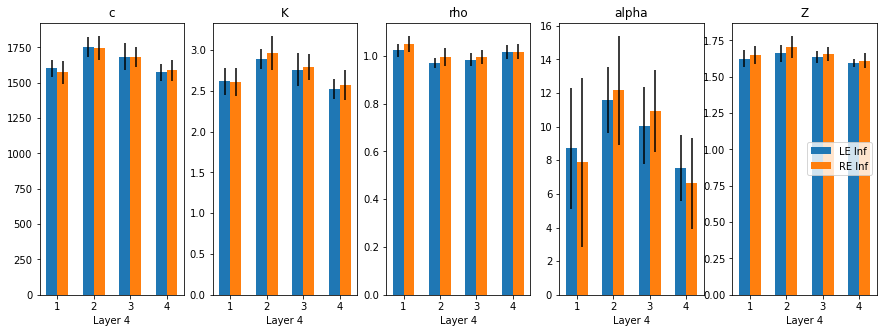

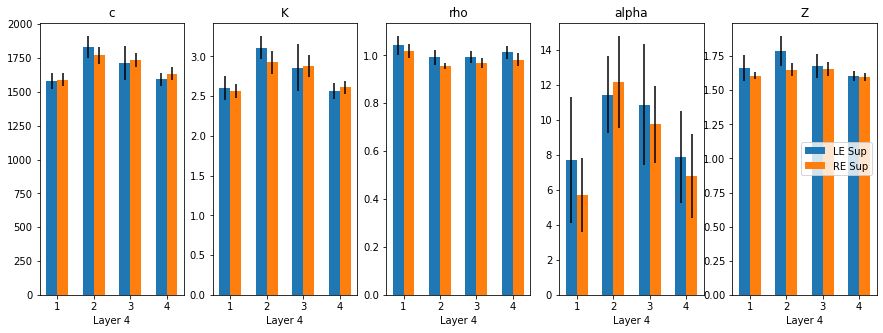

In [17]:
# Now compare Inf and Sup of LE-RE

num_layers = 4
inter_inf_diff = {} # Going to make use of dictionary
inter_sup_diff = {}

b_width = 0.3
x_l = [1-b_width/2,2-b_width/2,3-b_width/2,4-b_width/2]
x_r = [1+b_width/2,2+b_width/2,3+b_width/2,4+b_width/2]

inf_fig, inf_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
sup_fig, sup_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))

inf_ax = inf_ax.ravel()
sup_ax = sup_ax.ravel()

for pp, this_param in enumerate(param_list):
    temp_inf_diff_mat = np.zeros((num_layers,3))
    temp_sup_diff_mat = np.zeros((num_layers,3))
    for ll in range(num_layers):
        this_le_data = le_inf_data[le_inf_data['Layer'] == (ll+1)][this_param]
        this_re_data = re_inf_data[re_inf_data['Layer'] == (ll+1)][this_param]
        this_t, this_p = scipy.stats.ttest_ind(this_le_data,this_re_data)
        this_diff = this_le_data.mean() - this_re_data.mean()
        temp_inf_diff_mat[ll,:] = [this_diff, this_t, this_p]

        this_ax = inf_ax[pp]
        p_y = [this_le_data.mean(), this_re_data.mean()]
        p_err = [this_le_data.std(), this_re_data.std()]

        this_ax.bar(x=x_l[ll],height=p_y[0],yerr=p_err[0],width=b_width,color='tab:blue',label=f'LE Inf, Layer {ll+1}')
        this_ax.bar(x=x_r[ll],height=p_y[1],yerr=p_err[1],width=b_width,color='tab:orange',label=f'RE Inf, Layer {ll+1}')
        this_ax.set_xlabel(f'Layer {ll+1}')
        this_ax.set_title(this_param)

        this_le_data = le_sup_data[le_sup_data['Layer'] == (ll+1)][this_param]
        this_re_data = re_sup_data[re_sup_data['Layer'] == (ll+1)][this_param]
        this_t, this_p = scipy.stats.ttest_ind(this_le_data,this_re_data)
        this_diff = this_le_data.mean() - this_re_data.mean()
        temp_sup_diff_mat[ll,:] = [this_diff, this_t, this_p]

        this_ax = sup_ax[pp]
        p_y = [this_le_data.mean(), this_re_data.mean()]
        p_err = [this_le_data.std(), this_re_data.std()]

        this_ax.bar(x=x_l[ll],height=p_y[0],yerr=p_err[0],width=b_width,color='tab:blue',label=f'LE Sup, Layer {ll+1}')
        this_ax.bar(x=x_r[ll],height=p_y[1],yerr=p_err[1],width=b_width,color='tab:orange',label=f'RE Sup, Layer {ll+1}')
        this_ax.set_xlabel(f'Layer {ll+1}')
        this_ax.set_title(this_param)

    inter_inf_diff[this_param] = temp_inf_diff_mat.copy()
    inter_sup_diff[this_param] = temp_sup_diff_mat.copy()

inf_ax[-1].legend(('LE Inf','RE Inf'),loc='center right')
sup_ax[-1].legend(('LE Sup','RE Sup'),loc='center right')

# Create a DataFrame for each entry in the layer_diff dictionary, then concatenate all to concisely summarize
inf_df_list = []
sup_df_list = []
for pp, this_param in enumerate(param_list):
    this_df = pd.DataFrame(inter_inf_diff[this_param],columns=['Inf, LE-RE','t-stat','p-value'],index=[1,2,3,4])
    this_df.columns = pd.MultiIndex.from_product([[this_param], this_df.columns])
    inf_df_list.append(this_df)

    this_df = pd.DataFrame(inter_sup_diff[this_param],columns=['Sup, LE-RE','t-stat','p-value'],index=[1,2,3,4])
    this_df.columns = pd.MultiIndex.from_product([[this_param], this_df.columns])
    sup_df_list.append(this_df)

full_inf_df = pd.concat(le_df_list,axis=1)
full_sup_df = pd.concat(re_df_list,axis=1)
full_inf_df.index.rename('Layer',inplace=True)
full_sup_df.index.rename('Layer',inplace=True)

display(full_inf_df)
display(full_sup_df)

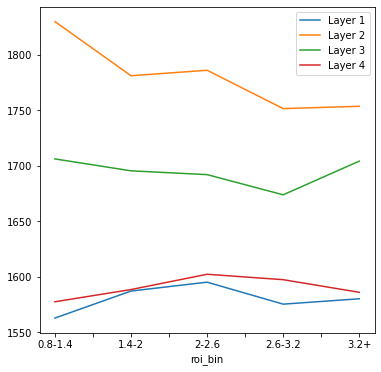

In [18]:
test_df = in_data.groupby(['roi_bin','Layer'],as_index=False).mean()
this_fig, this_ax = plt.subplots(1,1,figsize=(6,6))

for ll in range(num_layers):
    this_data = test_df[test_df['Layer'] == (ll+1)]
    this_data.plot.line(x='roi_bin',y='c',ax=this_ax,label=f'Layer {ll+1}')

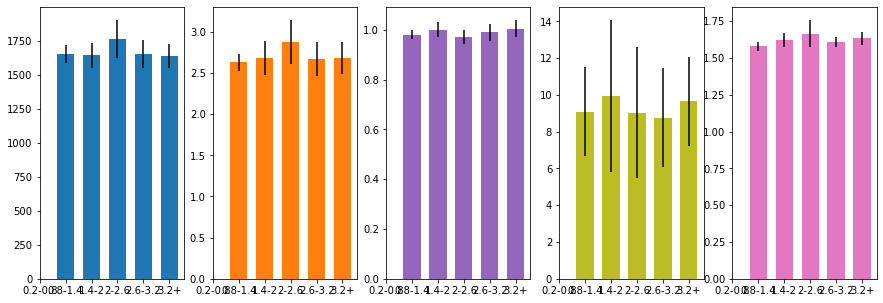

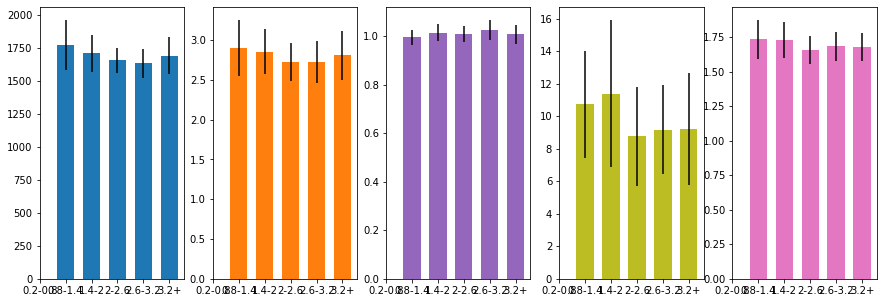

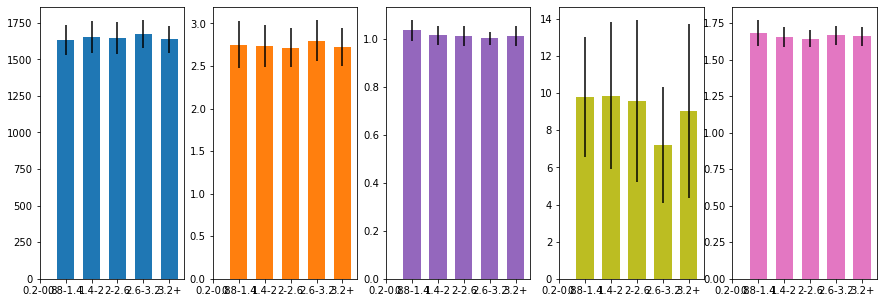

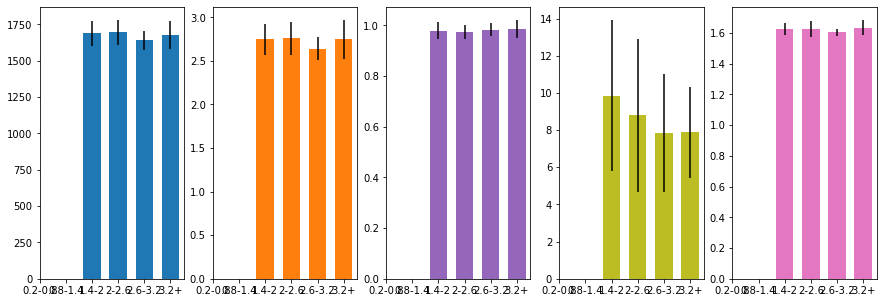

In [68]:
# Perform ANOVA for the mean parameter values as a function of distance from ROI
# Jump straight to looking at INF/SUP regions in LE/RE, so a total of 4 ANOVA for each parameter

eye_list = ['LE','RE']
reg_list = ['INF','SUP']

f_roi = []

roi_bins = in_data.groupby('roi_bin').count().index # list of the ROI bin ranges, hopefully sorted
color_list = ['tab:blue','tab:orange','tab:purple','tab:olive','tab:pink','tab:cyan','tab:red']

b_width = 0.3
num_bins = len(roi_bins)
x_pos = np.linspace(-num_bins/2,num_bins/2,num_bins)

for ee, this_eye in enumerate(eye_list):
    for rr, this_reg in enumerate(reg_list):
        this_df = in_data[in_data['Eye'] == this_eye]
        this_df = this_df[this_df['Region'] == this_reg]
        temp_res = np.zeros((num_param,2))

        this_fig, this_ax = plt.subplots(1,num_param,figsize=((3*num_param,5)))
        this_ax = this_ax.ravel()

        for pp, this_param in enumerate(param_list): # loop over the acoustic parameters list
            # Add lists of parameter values in each ROI bin to a master list
            this_data_list = []
            this_data_list = [this_df[this_df['roi_bin'] == x][this_param] for x in roi_bins]

            # Group for plotting purposes
            p_y = this_df.groupby('roi_bin')[this_param].mean().values
            p_err = this_df.groupby('roi_bin')[this_param].std().values
            #p_y['x_pos'] = x_pos
            #p_y.dropna(inplace=True)
            #p_err.dropna(inplace=True)
            this_ax[pp].bar(x=x_pos,height=p_y,yerr=p_err,color=color_list[pp])
            this_ax[pp].set_xticks(x_pos)
            this_ax[pp].set_xticklabels(roi_bins)

            # Remove any empty lists
            copy_list = []
            bin_list = []
            for ll in range(len(this_data_list)):
                if len(this_data_list[ll]) > 0:
                    copy_list.append(this_data_list[ll])
                    bin_list.append(roi_bins[ll])
            

            this_f, this_p = scipy.stats.f_oneway(*copy_list) # the '*' is used to unpack the argument list
            temp_res[pp,:] = [this_f,this_p]
        temp_df = pd.DataFrame(temp_res,columns=['f-stat','p-value'],index=param_list)
        temp_df.index = pd.MultiIndex.from_product([[this_eye+this_reg], temp_df.index])


        f_roi.append(temp_res)


    


In [60]:
p_y

array([['0.2-0.8', nan],
       ['0.8-1.4', 1652.78064],
       ['1.4-2', 1644.1876219583335],
       ['2-2.6', 1762.5156871666668],
       ['2.6-3.2', 1652.7770851250004],
       ['3.2+', 1635.9637871176471]], dtype=object)

In [32]:
temp_res

array([[0.44425424, 0.72224309],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [22]:
this_df.groupby('roi_bin').count()

,GP,relmyo,myolevel,Eye,Region,ROI,Layer,c,K,rho,alpha,Z
roi_bin,,,,,,,,,,,,
0.2-0.8,0,0,0,0,0,0,0,0,0,0,0,0
0.8-1.4,0,0,0,0,0,0,0,0,0,0,0,0
1.4-2,16,16,16,16,16,16,16,16,16,16,16,16
2-2.6,16,16,16,16,16,16,16,16,16,16,16,16
2.6-3.2,4,4,4,4,4,4,4,4,4,4,4,4
3.2+,28,28,28,28,28,28,28,28,28,28,28,28


In [26]:
roi_bins

CategoricalIndex(['0.2-0.8', '0.8-1.4', '1.4-2', '2-2.6', '2.6-3.2', '3.2+'], categories=['0.2-0.8', '0.8-1.4', '1.4-2', '2-2.6', '2.6-3.2', '3.2+'], ordered=True, name='roi_bin', dtype='category')

In [27]:
f_roi

[array([[4.40004599e+00, 2.30026573e-03],
        [2.57387986e+00, 4.08235481e-02],
        [3.64909815e+00, 7.54104137e-03],
        [6.38592017e-01, 6.35915324e-01],
        [3.84406324e+00, 5.54056275e-03]]),
 array([[2.2453989 , 0.06797615],
        [1.19099969, 0.31816866],
        [1.49897447, 0.20662188],
        [2.02782617, 0.09461636],
        [1.7496149 , 0.14339284]]),
 array([[0.44779821, 0.77390602],
        [0.33030342, 0.8573411 ],
        [1.82026243, 0.12687863],
        [1.1908981 , 0.31644567],
        [1.19745216, 0.31360176]]),
 array([[0.44425424, 0.72224309],
        [0.41191941, 0.7450267 ],
        [0.48584639, 0.69338948],
        [1.22862129, 0.30720494],
        [0.49342311, 0.68819558]])]